In [8]:
import argparse
from datetime import datetime
from repocollector.github import GithubRepositoriesCollector
import pandas as pd

api_token = ""
github_crawler = GithubRepositoriesCollector(api_token) 

id = []
name = []
url = []
star = []
result = github_crawler.collect_repositories(
                since=datetime(2009, 12, 31),
                until=datetime(2015, 12, 31),
                pushed_after=datetime(2015, 6, 1),
                min_issues=0,
                min_releases=0,
                min_stars=10000,
                min_watchers=0,
                primary_language="python")

for repo in result:
    id.append(repo['id'])
    name.append(repo['full_name'])
    url.append(repo['url'])
    star.append(repo['stars'])

df = pd.DataFrame(
    data={'id': id, 'name': name, 'url': url, 'star':star},
    columns=['id','name','url','star']
)
df.to_csv('resource/repo_list2.csv', index=False)
    

{'databaseId': 21289110, 'defaultBranchRef': {'name': 'master'}, 'owner': {'login': 'vinta'}, 'name': 'awesome-python', 'url': 'https://github.com/vinta/awesome-python', 'description': 'An opinionated list of awesome Python frameworks, libraries, software and resources.', 'primaryLanguage': {'name': 'Python'}, 'stargazers': {'totalCount': 205179}, 'watchers': {'totalCount': 5987}, 'releases': {'totalCount': 0}, 'issues': {'totalCount': 0}, 'createdAt': '2014-06-27T21:00:06Z', 'pushedAt': '2024-04-17T09:35:59Z', 'updatedAt': '2024-04-26T09:30:31Z', 'hasIssuesEnabled': False, 'isArchived': False, 'isDisabled': False, 'isMirror': False, 'isFork': False, 'object': {'entries': [{'name': '.github', 'type': 'tree'}, {'name': '.gitignore', 'type': 'blob'}, {'name': '.travis.yml', 'type': 'blob'}, {'name': 'CONTRIBUTING.md', 'type': 'blob'}, {'name': 'LICENSE', 'type': 'blob'}, {'name': 'Makefile', 'type': 'blob'}, {'name': 'README.md', 'type': 'blob'}, {'name': 'docs', 'type': 'tree'}, {'name'

In [2]:
import pandas as pd

df = pd.read_csv('resource/repo_list.csv', header=0)
df.head()

,id,name,url,star
0,21289110,vinta/awesome-python,https://github.com/vinta/awesome-python,205179
1,1039520,ytdl-org/youtube-dl,https://github.com/ytdl-org/youtube-dl,128483
2,33614304,nvbn/thefuck,https://github.com/nvbn/thefuck,82823
3,12888993,home-assistant/core,https://github.com/home-assistant/core,68639
4,21872392,josephmisiti/awesome-machine-learning,https://github.com/josephmisiti/awesome-machin...,63533


In [10]:
from git import Repo
from git import GitCommandError
for index, row in df.iterrows():
    print(str(index) + row['name'])
    try:
        Repo.clone_from(row['url'], 'repo/'+row['name'])
    except GitCommandError:
        continue

0vinta/awesome-python
1ytdl-org/youtube-dl
2nvbn/thefuck
3home-assistant/core
4josephmisiti/awesome-machine-learning
5keras-team/keras
63b1b/manim
7scrapy/scrapy
8soimort/you-get
9minimaxir/big-list-of-naughty-strings
10charlax/professional-programming
11isocpp/CppCoreGuidelines
12faif/python-patterns
13getsentry/sentry
14odoo/odoo
15shadowsocks/shadowsocks
16XX-net/XX-Net
17fxsjy/jieba
18hankcs/HanLP
19httpie/cli
20certbot/certbot
21sqlmapproject/sqlmap
22geekcomputers/Python
230xAX/linux-insides
24donnemartin/interactive-coding-challenges
25explosion/spaCy
26encode/django-rest-framework
27tqdm/tqdm
28donnemartin/data-science-ipython-notebooks
29StevenBlack/hosts
30ycm-core/YouCompleteMe
31getredash/redash
32nicolargo/glances
33python-telegram-bot/python-telegram-bot
34jumpserver/jumpserver
35locustio/locust
36chubin/wttr.in
37vnpy/vnpy
38drduh/macOS-Security-and-Privacy-Guide
39plotly/dash
40chriskiehl/Gooey
41ungoogled-software/ungoogled-chromium
42kholia/OSX-KVM
43kovidgoyal/calibr

In [3]:
from git import Repo
import glob
import os
for index, row in df.iterrows():
    print(str(index) + row['name'])
    cnt = 0
    path = 'repo/'+row['name']+'/**/*.py'
    file_list = []
    file_list = [p.replace('\\', '/') for p in glob.glob(path, recursive=True) if os.path.isfile(p)]
    for file in file_list:
        try:
            with open(file, 'r', encoding='utf-8', errors='ignore') as f:
                if f.read().isascii():
                    cnt += 1
        except OSError:
            continue
    df.loc[index, 'num_files'] = len(file_list)
    df.loc[index, 'num_valid_files'] = cnt
df.to_csv('resource/repo_list2.csv', index=False)

0vinta/awesome-python
1ytdl-org/youtube-dl
2nvbn/thefuck
3home-assistant/core
4josephmisiti/awesome-machine-learning
5keras-team/keras
63b1b/manim
7scrapy/scrapy
8soimort/you-get
9minimaxir/big-list-of-naughty-strings
10charlax/professional-programming
11isocpp/CppCoreGuidelines
12faif/python-patterns
13getsentry/sentry
14odoo/odoo
15shadowsocks/shadowsocks
16XX-net/XX-Net
17fxsjy/jieba
18hankcs/HanLP
19httpie/cli
20certbot/certbot
21sqlmapproject/sqlmap
22geekcomputers/Python
230xAX/linux-insides
24donnemartin/interactive-coding-challenges
25explosion/spaCy
26encode/django-rest-framework
27tqdm/tqdm
28donnemartin/data-science-ipython-notebooks
29StevenBlack/hosts
30ycm-core/YouCompleteMe
31getredash/redash
32nicolargo/glances
33python-telegram-bot/python-telegram-bot
34jumpserver/jumpserver
35locustio/locust
36chubin/wttr.in
37vnpy/vnpy
38drduh/macOS-Security-and-Privacy-Guide
39plotly/dash
40chriskiehl/Gooey
41ungoogled-software/ungoogled-chromium
42kholia/OSX-KVM
43kovidgoyal/calibr

25.75


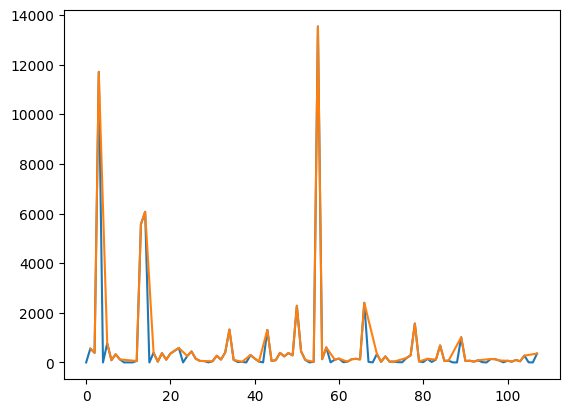

In [13]:
q1 = df['num_valid_files'].quantile(0.25)
print(q1)
df['num_valid_files'].plot()
filtered_df = df[df['num_valid_files'] >= q1]
filtered_df['num_valid_files'].plot()
filtered_df.to_csv('repo_list_quantile_25%.csv', index=False)

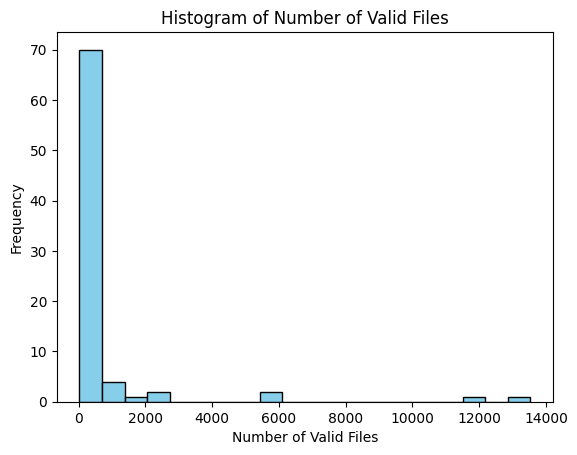

In [12]:
import matplotlib.pyplot as plt

# # ヒストグラム
# plt.hist(df['num_valid_files'], bins=20, color='skyblue', edgecolor='black')
# plt.xlabel('Number of Valid Files')
# plt.ylabel('Frequency')
# plt.title('Histogram of Number of Valid Files')
# plt.show()

# ヒストグラム
plt.hist(filtered_df['num_valid_files'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Valid Files')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Valid Files')
plt.show()


In [1]:
with open('code_snippet.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

In [2]:
# import random
# random.seed(100)

# random_lines = random.sample(lines, k=1000000)

In [2]:
import sentencepiece as spm
spm.SentencePieceTrainer.Train(
    sentence_iterator=iter(lines),  # コーパスファイル
    model_type="unigram",  # デフォルト
    model_prefix='code_snippet',  # 出力されるモデルのファイル名に使われる
    vocab_size=16000,  # 語彙数
    pad_id = 3,
    character_coverage = 1.0,
    user_defined_symbols = ['<add>','<del>','<ctxt>', '<sep>'],
)

In [3]:
from spm_processor import SpmProcessor
ps = SpmProcessor()
ps.initializer('code_snippet.model')

In [5]:
vocab = ps.generate_vocab()
print(lines[1])
en = ps.encode(lines[1], str)
print(en)
de = ps.decode(en)
print(de)

<ctxt>  import re <ctxt> from .common import InfoExtractor <ctxt> from ..utils import ( <add>     clean_html, <ctxt> extract_attributes, <add>     ExtractorError, <add>     get_element_by_id, <ctxt> int_or_none, <del>     str_to_int, <ctxt> merge_dicts, <add>     parse_count, <ctxt> T, <ctxt> traverse_obj, <ctxt> unified_strdate, <sep> <ctxt>  from ..utils import ( <ctxt> class YouPornIE(InfoExtractor): <del>     _VALID_URL = r'https?://(?:www\.)?youporn\.com/(?:watch|embed)/(?P<id>\d+)(?:/(?P<display_id>[^/?#&]+))?' <add>     _VALID_URL = ( <add>         r'youporn:(?P<id>\d+)', <add>         r'''(?x) <add>             https?://(?:www\.)?youporn\.com/(?:watch|embed)/(?P<id>\d+) <add>             (?:/(?:(?P<display_id>[^/?#&]+)/?)?)?(?:[#?]|$) <add>     ''' <add>     ) <ctxt> _EMBED_REGEX = [r'<iframe[^>]+\bsrc=["\'](?P<url>(?:https?:)?//(?:www\.)?youporn\.com/embed/\d+)'] <ctxt> _TESTS = [{ <ctxt> 'url': 'http://www.youporn.com/watch/505835/sex-ed-is-it-safe-to-masturbate-daily/', <sep

In [7]:
"abc　".isascii()

False